**Aluno**: Thiago César Silva Barbieri
**RA**: 779807

**Dataset**: https://www.kaggle.com/datasets/ivanchvez/causes-of-death-our-world-in-data

O objetivo deste experimento é utilizar o algoritmo KMeans para agrupar regiões com base em padrões encontrados nas quantidades e tipos de mortes ocorridas, a fim de identificar e implicitar as regiões com características semelhantes.

Lendo a base de dados no formato '.csv'.

In [1]:
import pandas as pd

df = pd.read_csv('annual-number-of-deaths-by-cause.csv')
df

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,Zimbabwe,ZWE,2015,NaN,1439.0,11161.0,632.0,2518.0,770.0,1302.0,...,2990.0,NaN,16649.0,2108.0,2751.0,1956.0,4202.0,146.0,754.0,215.0
8250,Zimbabwe,ZWE,2016,NaN,1457.0,11465.0,648.0,2050.0,801.0,1342.0,...,3027.0,NaN,16937.0,2160.0,2788.0,1962.0,4264.0,146.0,767.0,219.0
8251,Zimbabwe,ZWE,2017,NaN,1460.0,11744.0,654.0,2116.0,818.0,1363.0,...,2962.0,0.0,17187.0,2196.0,2818.0,2007.0,4342.0,144.0,781.0,223.0
8252,Zimbabwe,ZWE,2018,NaN,1450.0,12038.0,657.0,2088.0,825.0,1396.0,...,2890.0,NaN,17460.0,2240.0,2849.0,2030.0,4377.0,139.0,795.0,227.0


Removendo os nomes/códigos dos países, já que a intenção do projeto é tentar agrupar os dados supostamente por regiões (considerando que na verdade o algoritmo não sabe qual é a classe a ser determinada). Preenchendo também os espaços vazios com o valor 0.

In [2]:
X = df.drop(['Entity', 'Code'], axis=1).fillna(0)
X = X.set_index('Year')
X

,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
Year,,,,,,,,,,,,,,,,,,,,,
2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,148.0,252.0,4995.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,157.0,261.0,4790.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,167.0,270.0,4579.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,184.0,292.0,4259.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,191.0,305.0,4122.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0,1439.0,11161.0,632.0,2518.0,770.0,1302.0,29162.0,104.0,11214.0,...,2990.0,0.0,16649.0,2108.0,2751.0,1956.0,4202.0,146.0,754.0,215.0
2016,0,1457.0,11465.0,648.0,2050.0,801.0,1342.0,27141.0,110.0,10998.0,...,3027.0,0.0,16937.0,2160.0,2788.0,1962.0,4264.0,146.0,767.0,219.0
2017,0,1460.0,11744.0,654.0,2116.0,818.0,1363.0,24846.0,115.0,10762.0,...,2962.0,0.0,17187.0,2196.0,2818.0,2007.0,4342.0,144.0,781.0,223.0


Removendo valores indesejados de strings que representavam valores indeterminados aproximados e substituindo por possíveis valores inteiros próximos.

In [3]:
# replace '>1000' with 1001 and '>1' with 2
X = X.applymap(lambda x: 1001 if x == '>1000' else (2 if x == '>1' else x))
X

,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
Year,,,,,,,,,,,,,,,,,,,,,
2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,148.0,252.0,4995.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,157.0,261.0,4790.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,167.0,270.0,4579.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,184.0,292.0,4259.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,191.0,305.0,4122.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0,1439.0,11161.0,632.0,2518.0,770.0,1302.0,29162.0,104.0,11214.0,...,2990.0,0.0,16649.0,2108.0,2751.0,1956.0,4202.0,146.0,754.0,215.0
2016,0,1457.0,11465.0,648.0,2050.0,801.0,1342.0,27141.0,110.0,10998.0,...,3027.0,0.0,16937.0,2160.0,2788.0,1962.0,4264.0,146.0,767.0,219.0
2017,0,1460.0,11744.0,654.0,2116.0,818.0,1363.0,24846.0,115.0,10762.0,...,2962.0,0.0,17187.0,2196.0,2818.0,2007.0,4342.0,144.0,781.0,223.0


Esse código realiza uma análise de correlação entre as colunas do DataFrame X e remove aquelas colunas que apresentam correlação acima de um determinado limite *corr=0.7* . Isso é útil para reduzir a dimensionalidade dos dados e remover informações redundantes, o que pode melhorar a eficiência de análises posteriores.

In [4]:
import numpy as np

corr = 0.7

# Correlation matrix
corr_matrix = X.corr()

# Upper triangular matrix
upper_triangular = np.triu(corr_matrix, k=1)

# Boolean mask of correlations above threshold
mask = np.abs(upper_triangular) > corr

# Indices of columns to be removed
to_remove = [column for column in range(len(mask[0])) if True in mask[:,column]]

# Drop columns with identified indices
X = X.drop(X.columns[to_remove], axis=1)

/tmp/ipykernel_126407/1288433521.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X.corr()


Esse código aplica a técnica de normalização mínima-máxima aos dados contidos em um DataFrame X utilizando a classe MinMaxScaler da biblioteca scikit-learn. O método fit é utilizado para calcular os valores mínimo e máximo para cada coluna do DataFrame, que serão utilizados para normalizar os dados posteriormente.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

O método transform é utilizado para aplicar a normalização aos dados.

In [6]:
X_normalized = scaler.transform(X)
X_normalized

array([[0.00627615, 0.00678113, 0.00061067, 0.00155737, 0.00371621,
        0.00123999],
       [0.00711297, 0.0063141 , 0.00062717, 0.00158114, 0.00339929,
        0.00125376],
       [0.        , 0.00568755, 0.00063267, 0.00159541, 0.00304427,
        0.00126754],
       ...,
       [0.        , 0.00337554, 0.00027508, 0.00277948, 0.00451308,
        0.00061448],
       [0.        , 0.00335242, 0.00028058, 0.0028199 , 0.00440338,
        0.0006255 ],
       [0.        , 0.00335242, 0.00029158, 0.00285676, 0.00435005,
        0.00063928]])

Aplica-se o algoritmo de clustering K-Means aos dados normalizados contidos em um DataFrame X_normalized utilizando a classe KMeans da biblioteca scikit-learn. 
A curva do cotovelo é plotada para identificar o número ótimo de clusters para esses dados. 
A lista 'sse' armazena os valores de SSE para cada valor de k e a função plot é utilizada para plotar esses valores no gráfico. O ponto de inflexão na curva do cotovelo é o número ótimo de clusters para os dados.

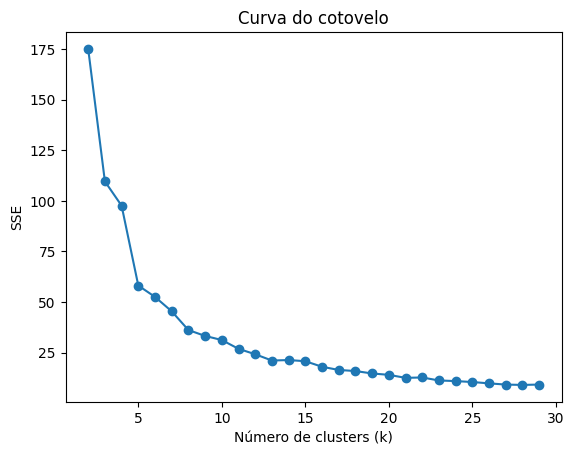

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

the_range = range(2,30)
sse = []
for k in the_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X_normalized)
    sse.append(kmeans.inertia_)

# Plotar curva do cotovelo
plt.plot(the_range, sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Curva do cotovelo')
plt.show()

O método fit_predict() do objeto kmeans que foi criado anteriormente com o número de clusters ótimo ajusta os dados de X ao modelo de clustering e retorna uma lista de rótulos de cluster, indicando a qual cluster cada amostra pertence.

In [8]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Executa uma análise de componentes principais (PCA) e plota os dados de entrada em um gráfico bidimensional, atribuindo cores diferentes para cada cluster identificado pelo algoritmo KMeans.

O código segue com a criação do objeto PCA na terceira linha, utilizando n_components igual a 2, que reduz a dimensionalidade dos dados para duas dimensões. Isso é necessário para permitir que os dados sejam visualizados em um gráfico bidimensional.

Depois, é chamado o método fit_transform() do objeto PCA, que aplica o algoritmo de PCA aos dados de entrada X.

E enfim, é utilizado o método scatter() para plotar um gráfico de dispersão bidimensional dos dados. Os argumentos X_pca[:, 0] e X_pca[:, 1] representam as coordenadas das duas principais componentes principais em cada eixo, respectivamente. O argumento c=kmeans.labels_ atribui cores diferentes para cada cluster identificado pelo algoritmo KMeans, utilizando a escala de cores viridis.

As linhas comentadas podem ser reinseridas ao código para visualização das centroides e seus respectivos raios na figura.

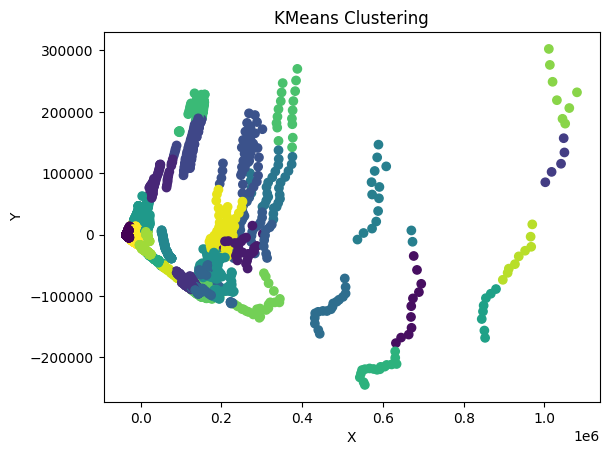

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')

# for i in range(kmeans.n_clusters):
#     centroid = kmeans.cluster_centers_[i]
#     distances = X_normalized[kmeans.labels_ == i] - centroid
#     distances = np.sqrt(np.sum(distances ** 2, axis=1))
#     radius = max(distances)
#     circle = plt.Circle(centroid, radius, color='black', fill=False)
#     plt.scatter(centroid[0], centroid[1], marker='*', s=300, c='black', label='Centroids')
#     plt.gca().add_artist(circle)

plt.title('KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Criamos um DataFrame que armazena os principais componentes calculados pelo algoritmo PCA.
Utilizamos do método heatmap() para mostra a importância de cada variável nos principais componentes calculados pelo algoritmo.
Cada linha do heatmap representa um componente e cada coluna representa uma variável. Os valores em cada célula indicam a contribuição de cada variável para o componente correspondente. As células coloridas com cores mais intensas indicam as variáveis que têm uma maior influência no componente, enquanto as células coloridas com cores mais suaves indicam as variáveis que têm uma menor influência.


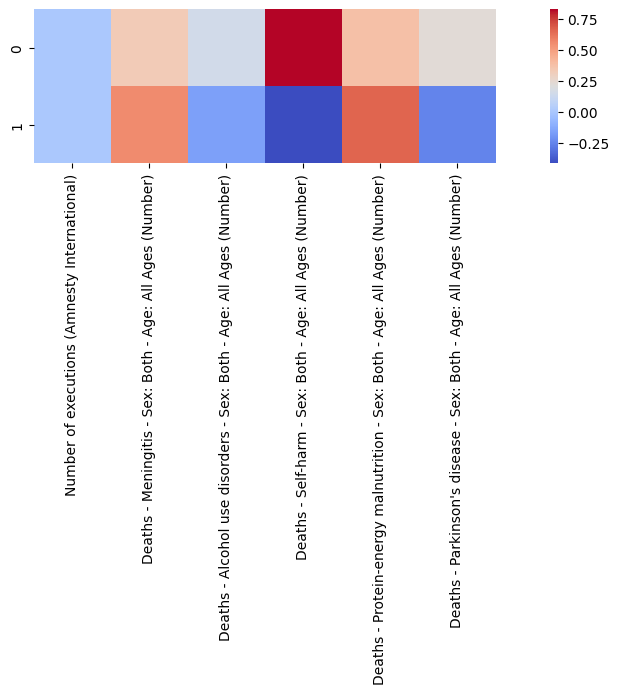

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# get the principal axes in feature space
principal_components = pd.DataFrame(pca.components_, columns=X.columns)

# create heatmap of principal components
fig, ax = plt.subplots(figsize=(14, 2))
sns.heatmap(principal_components, annot=False, cmap='coolwarm', square=True, ax=ax)
plt.show()